In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


# Chapter 10: 1 D Maps

In [21]:
x_n, x_nplus1, x_s, eta, etaplus1 = symbols('x_n x_{n+1} x_s eta \eta_{n+1}')
#Define x_n as nearby orbit. 
expr1 = Eq(x_n, x_s + eta); expr1

In [22]:
mapping_func = Eq(x_nplus1, f(x_n))
mapping_func

In [23]:
#So, x_n+1 + eta_n+1 = f(x_n + eta_n)
expr2 = Eq(x_nplus1 + etaplus1, f(x_n + eta))
expr2

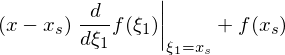

In [24]:
#Expand the rhs as a series
expr1_series = f(x).series(x,x_s,2).removeO(); expr1_series

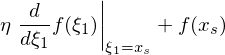

In [25]:
expr1_series.subs(x,expr1.rhs)

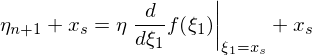

In [26]:
#Notice that if x_s is a stable point, x_s = f(x_s)
#This allows rewriting of expr2 to become: 
expr3 = Eq(expr2.lhs.subs({x_nplus1:x_s}), expr1_series.subs({x:expr1.rhs, f(x_s):x_s}))
simplify(expr3)

### Cobweb plots
The following is a method to iterate a defined function through into a plot. Clearly plotting these type of plots is not something anyone has yet needed much in python... quite clunky to implement. 

Consider sympy functions -> theano/lambdify as an option also. 

<IPython.core.display.Javascript object>


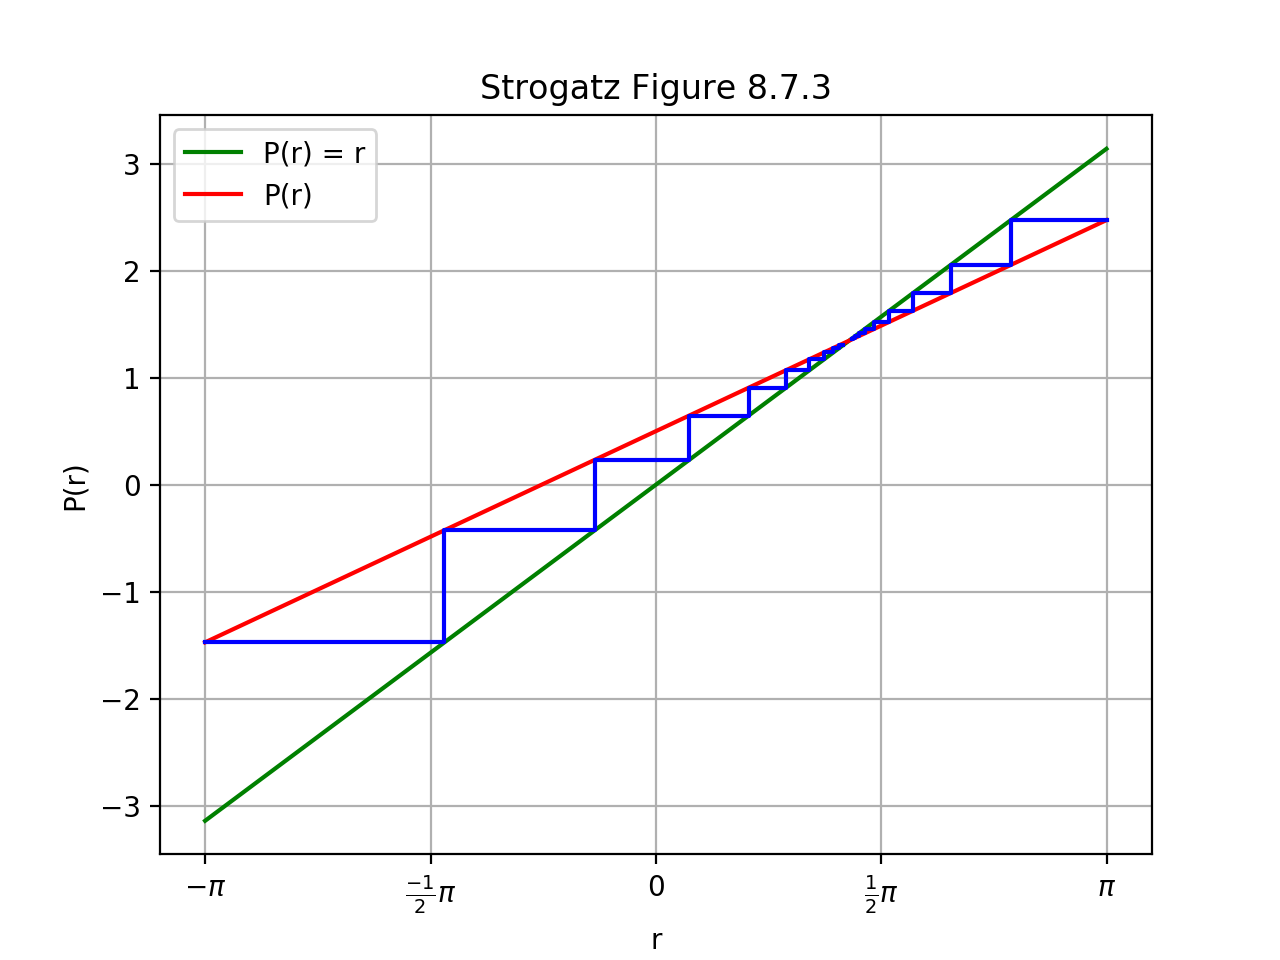

In [8]:
def func(x,mu,c4):
	return x*(2*np.pi/mu) + c4

def func_n(x,mu,c4,n):
    for i in range(-n,n):
        x = func(x,mu,c4)
        return x
# here is "plotting graphical" or "cobweb" for an interated map
# connect up (x, f^1(x)), (f^1(x),f^1(x)), (f^1(x), f^2(x)), (f^2(x),f^2(x))
#  ... (f^i(x), f^(i+1)(x)),(f^(i+1),f^(i+1)) to i=n
# initial x0, mu is a parameter to pass to function
# connect up points n times, this is 2n pairs of points
def plot_graphical(x0,mu,c4, n):
	xv = np.linspace(0.0,1.0,2*n)  # create array for points xvalue 
	yv = np.linspace(0.0,1.0,2*n)  # create array for points yvalue 
	x =x0
	for i in range(0,n):  #iterate
		xv[2*i] = x  # first point is (x,f(x))
		x = func(x,mu,c4)
		yv[2*i] = x
		xv[2*i+1] = x #second point is (f(x),f(x))
		yv[2*i+1] = x
	plt.plot(xv,yv,'b')  # connect up all these points blue

plt.figure()
plt.xlabel('r')
plt.ylabel('P(r)')
plt.xticks([-np.pi, -.5*np.pi,0., .5*np.pi, np.pi,],[r"$-\pi$",r"$\frac{-1}{2}\pi$","$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$"])

fac=1.01
xmax = np.pi
xmin =-np.pi
#ymax = 1.01
#ymin =0.01
#plt.axis([xmin*fac,xmax*fac,ymin*fac,ymax*fac])
xcon = np.arange(xmin, xmax, 0.01)   # to plot function 
plt.plot(xcon,xcon, 'g',label=r'P(r) = r')             #y=x plotted green

mu=10
c4= .5
ycon = func(xcon,mu,c4)                 # function computed
plt.plot(xcon,ycon, 'r', label="P(r)")             # function plotted red
plot_graphical(xmin,mu,c4,10)            # cobweb plot, 0.3 is initial condition
plot_graphical(xmax,mu,c4,10)            # cobweb plot, 0.3 is initial condition
plt.title('Strogatz Figure 8.7.3')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


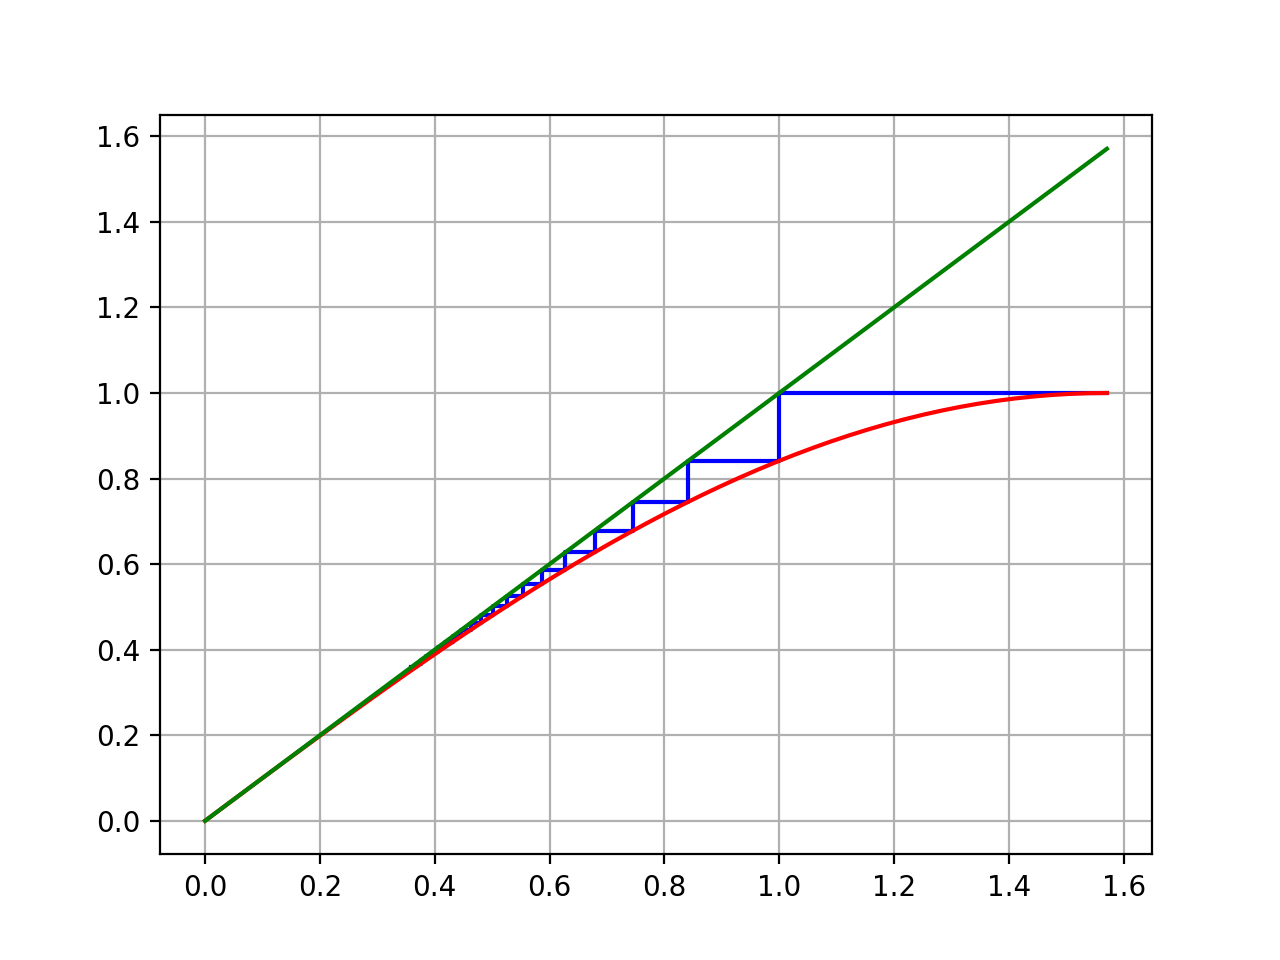

In [3]:
#Figure 10.1.2
#Define a function using sympy functions and variables.
base_f = lambdify(k,sin(k),'numpy')
size_of_array = 20
temp_x = np.pi/2
xmin = 0#xv.min()
xmax = temp_x
def cobwebplot(f=base_f,N=size_of_array,start_value=temp_x,xmin=xmin,xmax=xmax):
    xx = np.linspace(xmin,xmax)
    xv = np.empty((size_of_array*2,))
    yv = np.empty((size_of_array*2,))
    fig, ax1 = plt.subplots(1,1)
    for i in range(0,size_of_array):
        xv[2*i] = start_value  # first point is (x,f(x))
        start_value = base_f(start_value)
        yv[2*i] = start_value
        xv[2*i+1] = start_value #second point is (f(x),f(x))
        yv[2*i+1] = start_value
    #     print(xv[i], yv[i])
    ax1.plot(xv,yv,'b')  # connect up all these points blue
    ax1.plot(xx,base_f(xx),'r')
    ax1.plot(xx,xx,'g')
    ax1.grid()
cobwebplot()

<IPython.core.display.Javascript object>


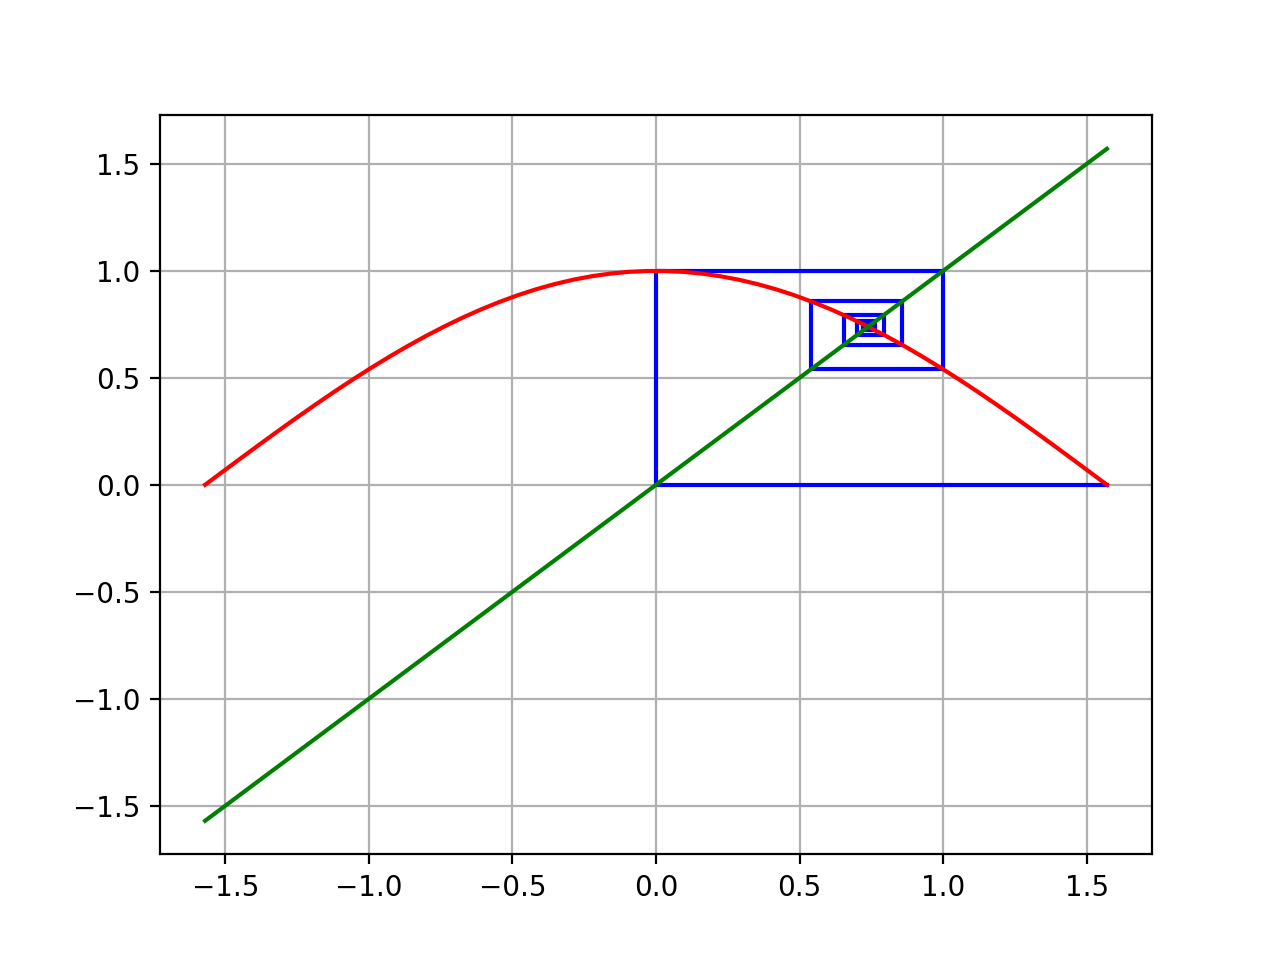

In [7]:
#Figure 10.1.3
base_f = lambdify(k,cos(k),'numpy')
size_of_array = 20
temp_x = np.pi/2
xmin = -np.pi/2#xv.min()
xmax = np.pi/2
cobwebplot(f=base_f, N=size_of_array,start_value=temp_x,xmin=xmin,xmax=xmax)

In [10]:
#Here is what the iteration is doing...
s = cos(np.pi/2)
for i in range(50):
    s = cos(s)
print(s)

0.739085132166338


### Orbit plot: 10.2.7 p.364

elapsed time: 0.3089 seconds


<IPython.core.display.Javascript object>


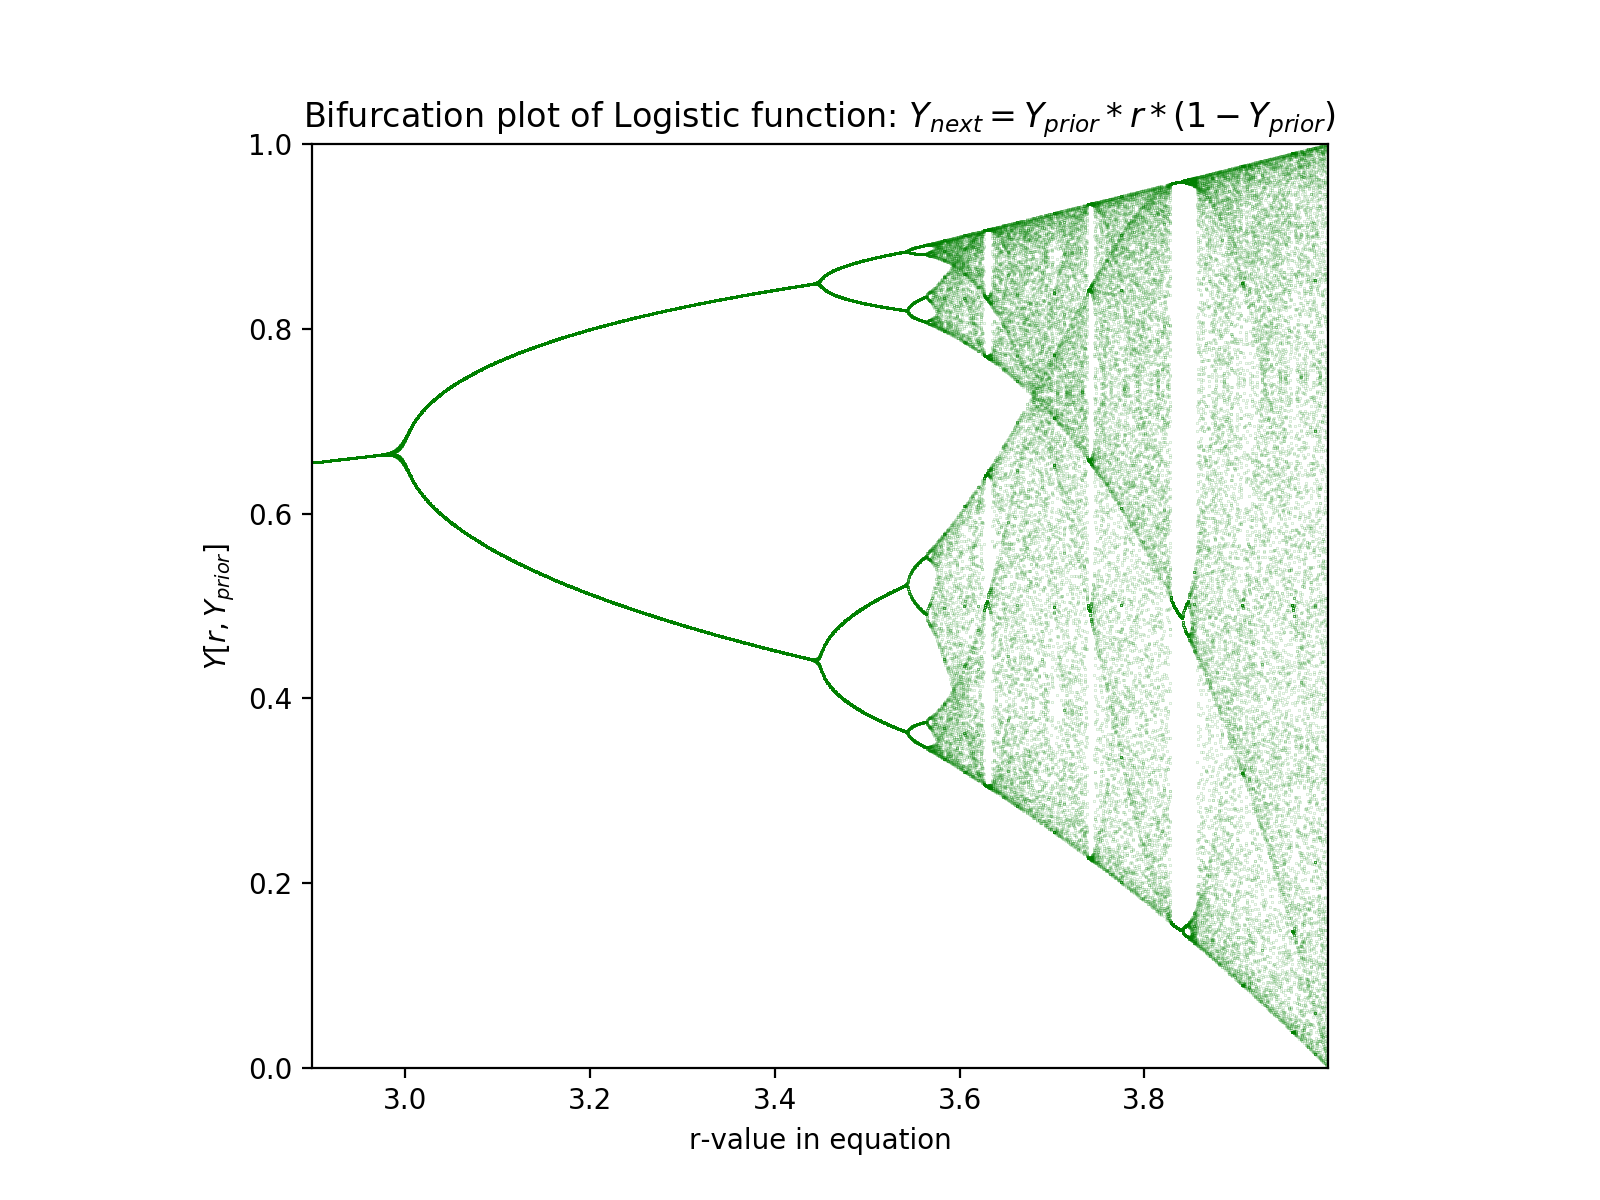

In [20]:
import time as tm

def logistic_func(r,x):
  return r*x*(1-x)

def xnext(r,xo,N):
    '''A two-step iterator'''
  no = 0
  X = np.zeros(r.size*N)
  A = np.zeros(r.size*N)
#Iterate for each value of r in the array of total_of_r (7000) values.
  for r_value in r:
    xinit = xo
#For each specific r value, iterate 200 x to get a starting value of X and A.
    for i in range(200):
      xinit = logistic_func(r_value,xinit)
    X[no] = xinit
    A[no] = r_value
    no += 1
#Now, for that r-value, iterate it N-times through the function.
#This gives N-values for each r-value.
    for j in range(1,N):
      X[no] = logistic_func(r_value,X[no-1])
      A[no]= r_value
      no += 1
  return A, X
xo = .4
Num = 71
r_min = 2.899
r_max = 3.999
total_of_r = 1700
r = np.linspace(r_min,r_max,total_of_r)

tic = tm.time()
A, X = xnext(r,xo,Num)
toc = tm.time()
print('elapsed time: %.4f seconds' % (toc-tic))

fig, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(A[300:],X[300:],".",markersize=0.1,color="green")
ax2.set_xlim(r_min,r_max)
ax2.set_ylim(0,1)
ax2.set_title(r'Bifurcation plot of Logistic function: $Y_{next} = Y_{prior}*r*(1-Y_{prior})$')
ax2.set_xlabel('r-value in equation')
ax2.set_ylabel(r'$Y[r,Y_{prior}]$')
plt.gca().set_aspect('equal', adjustable='box')